Optimal Weights: [0.20686784 0.20622165 0.23682716 0.35008335]
Expected Annual Return: 0.3934822027858846
Expected Volatility: 0.16527435372220545
Sharpe Ratio: 2.380781978111697


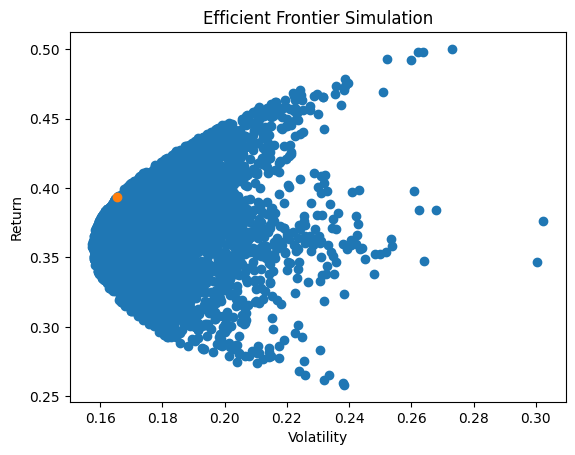

In [1]:
# ==================================
# PORTFOLIO OPTIMIZATION (MPT)
# ==================================

!pip install pandas numpy matplotlib scipy --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.random.seed(42)

# Generate synthetic stock returns
assets = 4
days = 252

returns = np.random.normal(0.001, 0.02, (days, assets))
df = pd.DataFrame(returns, columns=["Stock_A", "Stock_B", "Stock_C", "Stock_D"])
df.to_csv("portfolio_data.csv", index=False)

mean_returns = df.mean()
cov_matrix = df.cov()

def portfolio_performance(weights):
    ret = np.sum(mean_returns * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    return vol, ret

def negative_sharpe(weights):
    vol, ret = portfolio_performance(weights)
    return -(ret / vol)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for _ in range(assets))
init_guess = assets * [1./assets]

result = minimize(negative_sharpe, init_guess, bounds=bounds, constraints=constraints)
optimal_weights = result.x

vol, ret = portfolio_performance(optimal_weights)

print("Optimal Weights:", optimal_weights)
print("Expected Annual Return:", ret)
print("Expected Volatility:", vol)
print("Sharpe Ratio:", ret/vol)

# Plot random portfolios
port_returns = []
port_vols = []

for _ in range(5000):
    weights = np.random.random(assets)
    weights /= np.sum(weights)
    v, r = portfolio_performance(weights)
    port_vols.append(v)
    port_returns.append(r)

plt.figure()
plt.scatter(port_vols, port_returns)
plt.scatter(vol, ret)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient Frontier Simulation")
plt.show()